In [1]:
%load_ext lab_black

In [2]:
import sys
import os

# Add the parent folder to path to be able to easily access other agents
sys.path.append(os.path.abspath(os.path.join("..")))
# print("\n".join(sys.path))

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from luxai_s2.env import LuxAI_S2
import matplotlib.pyplot as plt
import numpy as np

from util import figures_to_subplots

# Import agents to work with
from agent_v5.agent import Agent

INFO:root:Starting Log
INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [5]:
# def animate(imgs, _return=True):
#     """
#     Combines images to make a video that can be rendered in notebook
#     Returns:
#         video generated from images
#     """
#     # using cv2 to generate videos as moviepy doesn't work on kaggle notebooks
#     import cv2
#     import os
#     import string
#     import random

#     vid_dir = "_videos"
#     os.makedirs(vid_dir, exist_ok=True)

#     video_name = (
#         "".join(random.choice(string.ascii_letters) for i in range(18)) + ".webm"
#     )
#     video_name = os.path.join(vid_dir, video_name)
#     height, width, layers = imgs[0].shape
#     fourcc = cv2.VideoWriter_fourcc(*"VP90")
#     video = cv2.VideoWriter(video_name, fourcc, 10, (width, height))

#     for img in imgs:
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         video.write(img)
#     video.release()
#     if _return:
#         from IPython.display import Video

#         return Video(video_name)


# def interact(env, agents, steps):
#     """
#     Plays the agents against each other for the first <steps> of the game
#     Returns:
#        a video of game"""
#     # reset our env
#     obs = env.reset(seed=41)
#     np.random.seed(0)
#     imgs = []
#     step = 0
#     # Note that as the environment has two phases, we also keep track a value called
#     # `real_env_steps` in the environment state. The first phase ends once `real_env_steps` is 0 and used below

#     # iterate until phase 1 ends
#     while env.state.real_env_steps < 0:
#         if step >= steps:
#             break
#         actions = {}
#         for player in env.agents:
#             o = obs[player]
#             a = agents[player].early_setup(step, o)
#             actions[player] = a
#         step += 1
#         obs, rewards, dones, infos = env.step(actions)
#         imgs += [env.render("rgb_array", width=640, height=640)]
#     done = False
#     while not done:
#         if step >= steps:
#             break
#         actions = {}
#         for player in env.agents:
#             o = obs[player]
#             a = agents[player].act(step, o)
#             actions[player] = a
#         step += 1
#         obs, rewards, dones, infos = env.step(actions)
#         imgs += [env.render("rgb_array", width=640, height=640)]
#         done = dones["player_0"] and dones["player_1"]
#     return animate(imgs)

# Make Video of Agents playing

In [6]:
# env = LuxAI_S2()  # create the environment object
# agents = {player: Agent(player, env.state.env_cfg) for player in env.possible_agents}
# interact(env, agents, 25)

# Working with env one step at a time

In [7]:
from util import show_env

env = LuxAI_S2()

## Early Setup Phase

INFO:root:initializing agent for player player_0
INFO:root:initializing agent for player player_1
INFO:root:player_0 Beginning of step update for step 0
INFO:root:player_0 Early setup action {'faction': 'TheBuilders', 'bid': 0}
INFO:root:player_1 Beginning of step update for step 0
INFO:root:player_1 Early setup action {'faction': 'TheBuilders', 'bid': 0}
INFO:root:player_0 Beginning of step update for step 1
INFO:root:player_0 Early setup action {'spawn': (28, 16), 'metal': 150, 'water': 150}
INFO:root:player_1 Beginning of step update for step 1
INFO:root:player_1 Early setup action {}
INFO:root:player_0 Beginning of step update for step 2
INFO:root:player_0 Early setup action {}
INFO:root:player_1 Beginning of step update for step 2
INFO:root:player_1 Early setup action {'spawn': (4, 9), 'metal': 150, 'water': 150}
INFO:root:player_0 Beginning of step update for step 3
INFO:root:player_0 Early setup action {'spawn': (12, 2), 'metal': 150, 'water': 150}
INFO:root:player_1 Beginning o

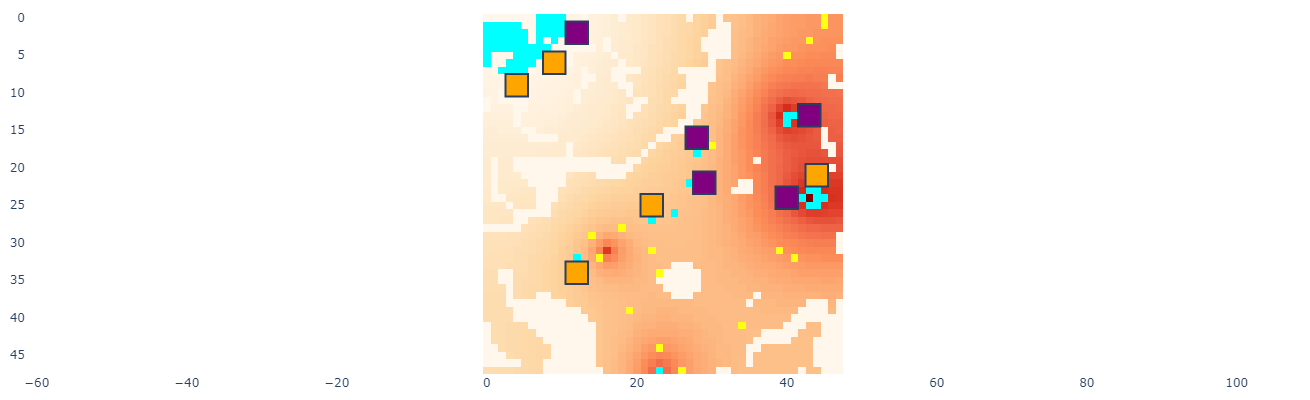

In [14]:
# Run the early_setup phase
agents = {player: Agent(player, env.state.env_cfg) for player in env.possible_agents}
agent = agents["player_0"]
# obs = env.reset(seed=42)  # resets an environment with a seed
obs = env.reset(seed=178220973)  # resets an environment with a seed
step = 0

while env.state.real_env_steps < 0:
    actions = {}
    for player in env.agents:
        o = obs[player]
        acts = agents[player].early_setup(step, o)
        actions[player] = acts
    step += 1
    obs, rewards, dones, infos = env.step(actions)
# plt.imshow(env.render("rgb_array", width=640, height=640))
show_env(env)

## Run one step at a time

In [32]:
# Advance to later state
while env.state.real_env_steps < 52:
    print(f"Carrying out real step {step}, env step {env.state.real_env_steps}")
    actions = {player: agent.act(step, obs[player]) for player, agent in agents.items()}
    step += 1
    obs, rewards, dones, infos = env.step(actions)

INFO:root:player_0 ======== Start of turn for player_0 ============
INFO:root:player_0 Beginning of step update for step 25
INFO:root:player_0 player_0 Factory actions: {}
INFO:root:player_1 ======== Start of turn for player_1 ============
INFO:root:player_1 Beginning of step update for step 25
INFO:root:player_1 player_1 Factory actions: {}
INFO:root:player_0 ======== Start of turn for player_0 ============
INFO:root:player_0 Beginning of step update for step 26
INFO:root:player_0 player_0 Factory actions: {}
INFO:root:player_1 ======== Start of turn for player_1 ============
INFO:root:player_1 Beginning of step update for step 26
INFO:root:player_1 player_1 Factory actions: {}
INFO:root:player_0 ======== Start of turn for player_0 ============
INFO:root:player_0 Beginning of step update for step 27
INFO:root:player_0 player_0 Factory actions: {}
INFO:root:player_1 ======== Start of turn for player_1 ============
INFO:root:player_1 Beginning of step update for step 27
INFO:root:player

Carrying out real step 25, env step 14
Carrying out real step 26, env step 15
Carrying out real step 27, env step 16
Carrying out real step 28, env step 17
Carrying out real step 29, env step 18
Carrying out real step 30, env step 19
Carrying out real step 31, env step 20
Carrying out real step 32, env step 21
Carrying out real step 33, env step 22
Carrying out real step 34, env step 23
Carrying out real step 35, env step 24
Carrying out real step 36, env step 25
Carrying out real step 37, env step 26
Carrying out real step 38, env step 27


INFO:root:player_1 Beginning of step update for step 38
INFO:root:player_1 player_1 Factory actions: {}
INFO:root:player_0 ======== Start of turn for player_0 ============
INFO:root:player_0 Beginning of step update for step 39
INFO:root:player_0 player_0 Factory actions: {}
INFO:root:player_1 ======== Start of turn for player_1 ============
INFO:root:player_1 Beginning of step update for step 39
INFO:root:player_1 player_1 Factory actions: {}
INFO:root:player_0 ======== Start of turn for player_0 ============
INFO:root:player_0 Beginning of step update for step 40
INFO:root:player_0 player_0 Factory actions: {}
INFO:root:player_1 ======== Start of turn for player_1 ============
INFO:root:player_1 Beginning of step update for step 40
INFO:root:player_1 player_1 Factory actions: {}
INFO:root:player_0 ======== Start of turn for player_0 ============
INFO:root:player_0 Beginning of step update for step 41
INFO:root:player_0 player_0 Factory actions: {}
INFO:root:player_1 ======== Start of

Carrying out real step 39, env step 28
Carrying out real step 40, env step 29
Carrying out real step 41, env step 30
Carrying out real step 42, env step 31
Carrying out real step 43, env step 32
Carrying out real step 44, env step 33
Carrying out real step 45, env step 34
Carrying out real step 46, env step 35
Carrying out real step 47, env step 36
Carrying out real step 48, env step 37
Carrying out real step 49, env step 38
Carrying out real step 50, env step 39


INFO:root:player_0 ======== Start of turn for player_0 ============
INFO:root:player_0 Beginning of step update for step 51
INFO:root:player_0 player_0 Factory actions: {}
INFO:root:player_1 ======== Start of turn for player_1 ============
INFO:root:player_1 Beginning of step update for step 51
INFO:root:player_1 player_1 Factory actions: {}
INFO:root:player_0 ======== Start of turn for player_0 ============
INFO:root:player_0 Beginning of step update for step 52
INFO:root:player_0 player_0 Factory actions: {}
INFO:root:player_1 ======== Start of turn for player_1 ============
INFO:root:player_1 Beginning of step update for step 52
INFO:root:player_1 player_1 Factory actions: {}
INFO:root:player_0 ======== Start of turn for player_0 ============
INFO:root:player_0 Beginning of step update for step 53
INFO:root:player_0 player_0 Factory actions: {}
INFO:root:player_1 ======== Start of turn for player_1 ============
INFO:root:player_1 Beginning of step update for step 53
INFO:root:player

Carrying out real step 51, env step 40
Carrying out real step 52, env step 41
Carrying out real step 53, env step 42
Carrying out real step 54, env step 43
Carrying out real step 55, env step 44
Carrying out real step 56, env step 45
Carrying out real step 57, env step 46
Carrying out real step 58, env step 47
Carrying out real step 59, env step 48
Carrying out real step 60, env step 49
Carrying out real step 61, env step 50
Carrying out real step 62, env step 51


In [16]:
# # Kill a specific factory
# env.state.factories["player_0"]["factory_0"].cargo.water = 0

# # Kill a specific unit
# from luxai_s2.actions import SelfDestructAction

# unit = env.state.units["player_0"]["unit_11"]
# unit.action_queue = [SelfDestructAction()]

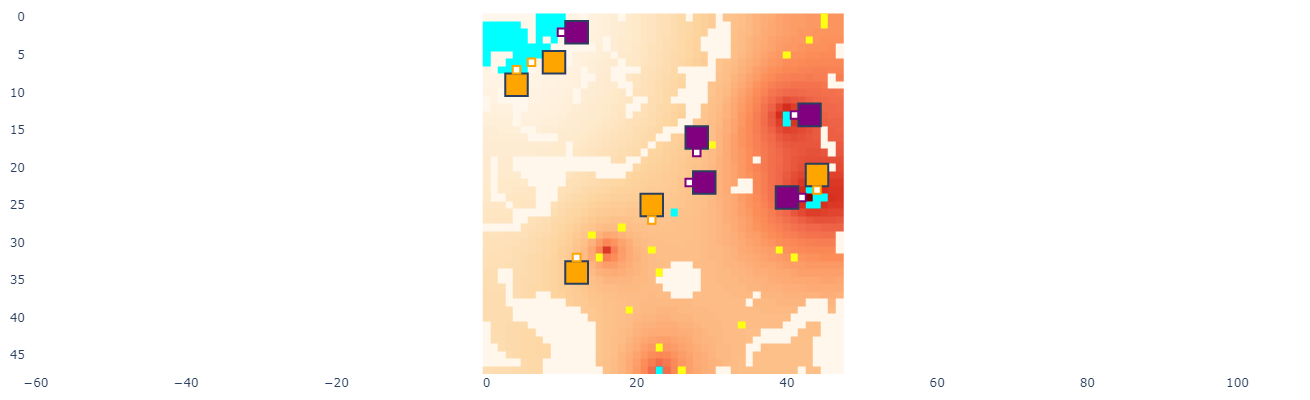

In [33]:
show_env(env)

INFO:root:player_0 ======== Start of turn for player_0 ============
INFO:root:player_0 Beginning of step update for step 66
INFO:root:player_0 player_0 Factory actions: {}
INFO:root:player_1 ======== Start of turn for player_1 ============
INFO:root:player_1 Beginning of step update for step 66
INFO:root:player_1 player_1 Factory actions: {}


Carrying out real step 66, env step 55


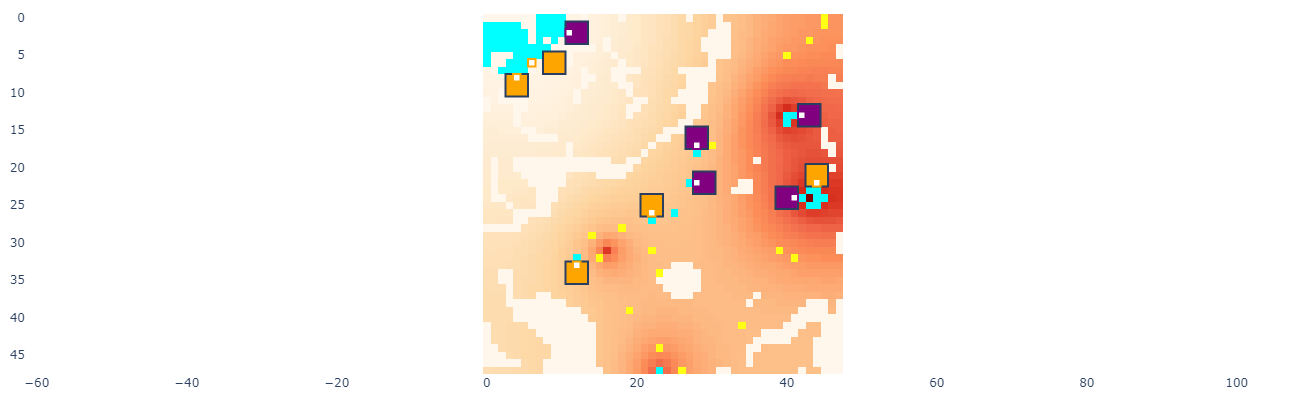

In [40]:
# Step one at a time
print(f"Carrying out real step {step}, env step {env.state.real_env_steps}")
actions = {player: agent.act(step, obs[player]) for player, agent in agents.items()}
step += 1
obs, rewards, dones, infos = env.step(actions)

show_env(env)

In [41]:
unit = agent.master.units.friendly.heavy["unit_11"]
unit.unit.action_queue

[]

In [ ]:
from mining_planner import MiningRoutePlanner
from util import ICE, POWER

In [ ]:
agent.master.units.friendly.heavy

In [ ]:
factory = agent.master.factories.friendly["factory_2"]
unit = agent.master.units.friendly.heavy["unit_11"]

unit_pos = unit.pos
unit_id = unit.unit_id
unit_power = unit.unit.power
unit_type = unit.unit.unit_type
unit_cfg = unit.unit.unit_cfg
# unit_pos = [29, 22]
# unit_power = 100
# unit_type = "HEAVY"
# unit_cfg = LIGHT_UNIT.unit_cfg

resource_pos = [10, 2]

route_planner = MiningRoutePlanner(
    pathfinder=agent.master.pathfinder,
    rubble=agent.master.maps.rubble,
    resource_pos=resource_pos,
    resource_type=ICE,
    factory=factory,
    unit_pos=unit_pos,
    unit_id=unit_id,
    unit_power=unit_power,
    unit_type=unit_type,
)
route_planner._move_to_edge_of_factory()

In [ ]:
agent = agents["player_0"]
f = agent.master.factories.friendly["factory_2"]

In [ ]:
f.factory.cargo

In [ ]:
a = env.get_state().units["player_0"]["unit_11"]
t = a.action_queue[-1]

# Development Below Here

In [ ]:
raise Exception('Below here is for development')

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from typing import Tuple

from util import (
    count_connected_values,
    convolve_array_kernel,
    factory_map_kernel,
    manhattan_kernel,
)


def add_map(fig, map_array, row=None, col=None):
    fig.add_trace(
        go.Heatmap(
            z=map_array.T,
            # colorscale="OrRd",
            # name="Rubble",
            # uid=f'{step}_Rubble',
            # showscale=False,
        ),
        row=row,
        col=col,
    )
    fig.update_yaxes(
        # scaleanchor="x",
        autorange="reversed",
    )
    return fig

## Thinking about how to value areas on map based on rubble

In [ ]:
game_state = agent.master.game_state
rubble = game_state.board.rubble

### Value based on connected zeros

In [ ]:
count_arr = count_connected_values(rubble, value=0)
print(count_arr)

^ That gives how many connected zeros at any point

Let's evaluate the value based on a convolution (where the middle is blanked out by the factory placement)

In [ ]:
factory_map_kernel(2, dist_multiplier=0.5)

### All in one

In [ ]:
game_state = agent.master.game_state
rubble = game_state.board.rubble
count_arr = count_connected_values(rubble, value=0)

kernel = factory_map_kernel(3, dist_multiplier=0.5)

conv_count_arr = convolve_array_kernel(count_arr, kernel)

figs = []
for i, arr in enumerate((rubble, kernel, count_arr, conv_count_arr)):
    fig = go.Figure()
    add_map(fig, arr)
    figs.append(fig)
fig = figures_to_subplots(figs)
fig.update_layout(height=700, width=800)
fig.update_yaxes(
    autorange="reversed",
)
fig.show()

## How to value areas based best place to rubble clear

Aiming to calculate best area near factory to clear rubble to increase total area of zeros connected to factory for lichen growth

Todos:
- Convert rubble to something rounded into units of light/heavy mine quantity (i.e. rubble 1 and 17 are equally bad for heavy that can mine 20 at a time)
- Main weighting should come from what is good for the factory
    - Some combination of generally low rubble areas nearby (quicker to clear)
    - Specific rubble areas that would connect to larger areas of zeros (or at least low rubble)
- weight toward location of unit
- Once I have a way to generate maps of high value areas to clear
    - Calculate best route one step at a time, each time using the previous answer and adding one new step (but calculating a new path back to factory at the end)

### Relevant Info
Info is for Light, heavy is 20x higher unless specified
- Max power: 150
- Power gain: 1  (10 for Heavy)
- Move cost: 1+0.05\*rubble
- Rubble dig cost: 5
- Rubble dig amount: 2

Something like 20 digs on a full tank for a light unit (accounting for some move cost on rubble, and dig cost, but effectively free travel on zero rubble tiles)

In [ ]:
from util import (
    pad_and_crop,
    connected_factory_zeros,
    append_zeros,
    create_boundary_array,
    SubsetExtractor,
    manhattan_distance_between_values,
)

from util import stretch_middle_of_factory_array
from rubble_clearing_planner import RubbleDigValue

In [ ]:
# # Testing pad_and_crop
# x1, y1 = 30, 5
# new_arr = pad_and_crop(np.ones((54, 15)), rubble, x1, y1)
# fig = add_map(go.Figure(), new_arr).update_layout(height=500, width=600)
# fig.add_trace(go.Scatter(x=[x1], y=[y1]))
# fig.show()

In [ ]:
# # Testing SubsetExtractor
# # all within bounds
# # x1, y1 = 16, 31
# # cx, cy = (18, 32)

# # extending outside of bounds
# x1, y1 = 27, 0
# cx, cy = (29, 3)

# extractor = SubsetExtractor(rubble, (cx, cy), radius=7)
# new_arr = extractor.get_subset()
# nx1, ny1 = extractor.convert_coordinate((x1, y1))
# figs = []

# for arr, x, y in zip([rubble, new_arr], [x1, nx1], [y1, ny1]):
#     fig = add_map(go.Figure(), arr).update_layout(height=500, width=600)
#     fig.add_trace(go.Scatter(x=[x], y=[y]))
#     figs.append(fig)
# fig = figures_to_subplots(figs).update_layout(height=500, width=1000)
# fig.update_yaxes(
#     # scaleanchor="x",
#     autorange="reversed",
# )
# fig.show()

### First calculate a general value map for a singe factory with no specific unit position

This will be the map that is used to make recommendations for what rough area is a good place to remove rubble from. 

After this, I will focus on a more specific cost including the position of a single unit (for calculating a route to mine rubble)

In [ ]:
# Required
single_factory = agent.master.factories.friendly["factory_6"]
rubble = game_state.board.rubble
all_factory_map = agent.master.maps.factory_maps.all

# Calculated
factory_pos = single_factory.factory.pos

rubble_value = RubbleDigValue(
    rubble=rubble,
    full_factory_map=all_factory_map,
    factory_pos=factory_pos,
    factory_dist=10,
    factory_dist_dropoff=0.8,
    boundary_kernel_size=3,
    boundary_kernel_dropoff=0.7,
)

arrays = {}
arrays["full_rubble_map"] = rubble
arrays["rubble_subset"], new_factory_pos = rubble_value._get_rubble_subset()
arrays["factory_weighting"] = rubble_value._get_factory_weighting()
arrays["manhattan_dist_to_zeros"] = rubble_value._get_manhattan_dist_to_zeros()
arrays["boundary_array"] = rubble_value._get_boundary_array()
arrays["conv_boundary_array"] = rubble_value._get_conv_boundary_array()
arrays["low_rubble_value"] = rubble_value._get_low_rubble_value()
arrays["final_value"] = rubble_value.calculate_final_value()

figs = []
for k, arr in arrays.items():
    fig = add_map(go.Figure(), arr).update_layout(title=f"{k}")
    figs.append(fig)

# Add factory pos to the full maps
for fig in [figs[0], figs[-1]]:
    fig.add_trace(
        go.Scatter(
            x=[factory_pos[0]],
            y=[factory_pos[1]],
            mode="markers",
            marker=dict(
                color="white",
                symbol="cross-thin",
                size=15,
                line=dict(color="white", width=1),
            ),
        )
    )

# Add factory pos to the subset maps
for fig in figs[1:-1]:
    fig.add_trace(
        go.Scatter(
            x=[new_factory_pos[0]],
            y=[new_factory_pos[1]],
            mode="markers",
            marker=dict(
                color="white",
                symbol="cross-thin",
                size=15,
                line=dict(color="white", width=1),
            ),
        )
    )

fig = figures_to_subplots(figs, title="All data that makes factory rubble dig value")
fig.update_layout(height=1000, width=1200)
fig.show()

### Now for all factories

In [ ]:
rubble = game_state.board.rubble

figs = []
figs.append(add_map(go.Figure().update_layout(title="Rubble Map"), rubble))
for factory_manager in agent.master.factories.friendly.values():
    final_value = RubbleDigValue(
        rubble,
        agent.master.maps.factory_maps.all,
        factory_manager.factory.pos,
        factory_dist=10,
    ).calculate_final_value()

    fig = go.Figure().update_layout(
        title=f"{factory_manager.factory.unit_id}: {factory_manager.factory.pos}"
    )
    add_map(fig, final_value)
    figs.append(fig)


fig = figures_to_subplots(figs)
fig.update_layout(height=900, width=1200)
fig.update_yaxes(autorange="reversed", matches="y")
fig.update_xaxes(matches="x")
fig.show()

### Calculate recommendations for units using above

In [ ]:
from rubble_clearing_planner import RubbleClearingPlanner

In [ ]:
agent.master.units.friendly.all.keys()

In [ ]:
# required
master = agent.master
unit = agent.master.units.friendly.all["unit_10"]

# Test calculation
rcp = RubbleClearingPlanner(master=master)

# Called once at beginning of turn (dist=10 = 10ms, dist=20 = 60ms)
rcp.update()

# Calculate single recommendation
rec = rcp.recommend(unit)
print(f"role: {rec.role}")
print(f"best_coord: {rec.best_coord}")

### Now calculate a route for a unit to take for rubble clearing

In [ ]:
from __future__ import annotations
import copy
import math
import logging
from scipy.ndimage import binary_dilation, generate_binary_structure

from unit_manager import FriendlyUnitManger
from rubble_clearing_planner import (
    calc_path_to_factory,
    power_cost_of_path,
    calc_value_to_move,
    calc_best_direction,
)

from util import (
    path_to_actions,
    power_cost_of_actions,
    nearest_non_zero,
    add_direction_to_pos,
    find_border_coords,
    direction_to,
)

from util import (
    LIGHT_UNIT,
    HEAVY_UNIT,
    MOVE_DIRECTIONS,
    MOVE_DELTAS,
    ACT_START_N,
    ACT_TYPE,
    ACT_DIRECTION,
    ACT_RESOURCE,
    ACT_AMOUNT,
    POWER,
    TRANSFER,
    PICKUP,
    DESTRUCT,
    RECHARGE,
    DIG,
    MOVE,
)

In [ ]:
from rubble_clearing_planner import RubbleRoutePlanner

# Reminder that these are what we have from above
rcp, rec, unit

In [ ]:
factory = rcp.master.factories.friendly[unit.factory_id]

# unit_pos = unit.pos
# unit_power = unit.unit.power
# unit_type = unit.unit.unit_type
# unit_cfg = unit.unit.unit_cfg
unit_pos = [29, 22]
unit_power = 100
unit_type = "LIGHT"
unit_cfg = LIGHT_UNIT.unit_cfg

route_planner = RubbleRoutePlanner(
    pathfinder=agent.master.pathfinder,
    rubble=rcp.master.maps.rubble,
    rubble_value_map=rcp._factory_value_maps[unit.factory_id],
    factory=factory,
    unit_pos=unit_pos,
    unit_power=unit_power,
    unit_type=unit_type,
)

In [ ]:

# One off setup
rubble = game_state.board.rubble
all_factory_map = agent.master.maps.factory_maps.all
game_state = agent.master.game_state

# Setup per unit
unit = copy.copy(LIGHT_UNIT)
unit.pos = np.array([29, 22])
unit.power = 100
unit.action_queue = []
factory_id = "factory_8"

# Calculated once per route planning
factory_loc = np.zeros_like(all_factory_map)
factory_loc[all_factory_map == unit_factory_id] = 1

unit_factory_id = agent.master.factories.friendly[factory_id].factory.strain_id
factory = agent.master.factories.friendly[factory_id]
factory_pos = factory.factory.pos
factory_rubble_values = RubbleDigValue(
    rubble, all_factory_map, factory_pos, factory_dist=10
).calculate_final_value()

arrays = {}
arrays["full_rubble_map"] = rubble
arrays["factory_value_map"] = factory_rubble_values
arrays["factory_loc"] = factory_loc


# Set up initial variables that will change during route planning
future_rubble = rubble.copy()
frubble_value = factory_rubble_values.copy()
pos = unit.pos


# If unit already on factory, pick up power and move to highest value around factory
if factory_loc[unit.pos[0], unit.pos[1]] == 1:
    print(f"unit starting at factory")
    if unit.power < unit.unit_cfg.BATTERY_CAPACITY:
        print(f"unit topping up battery")
        unit.action_queue.append(
            unit.pickup(
                POWER,
                unit.power - unit.unit_cfg.BATTERY_CAPACITY - unit.unit_cfg.CHARGE,
            )
        )

    surrounding_coords = find_border_coords(all_factory_map, value=unit_factory_id)
    coors_with_values = [(frubble_value[x, y], (x, y)) for x, y in surrounding_coords]
    best_coord = list(sorted(coors_with_values, key=lambda v: v[0]))[-1][1]
    print(f"unit moving to {best_coord}")
    path = agent.master.pathfinder.path_fast(unit.pos, best_coord)
    pos = path[-1]
    unit.action_queue.extend(path_to_actions(path))

while len(unit.action_queue) < 20:
    action_queue_cost = power_cost_of_actions(game_state, unit, unit.action_queue)
    path_to_factory = calc_path_to_factory(agent.master.pathfinder, pos, factory_loc)
    cost_to_factory = power_cost_of_path(
        path_to_factory, future_rubble, unit_type=unit.unit_type
    )
    power_remaining = unit.power - action_queue_cost - cost_to_factory

    # If enough energy to do more things
    print(
        f"beginning of loop power: cost_to_factory={cost_to_factory}, action_cost={action_queue_cost}, power_remaining={power_remaining}"
    )
    if power_remaining > 5:
        unit_multiplier = pad_and_crop(
            0.9 ** manhattan_kernel(10), frubble_value, pos[0], pos[1], fill_value=0
        )
        value_array = frubble_value * unit_multiplier
        value_at_pos = value_array[pos[0], pos[1]]
        value_to_move = calc_value_to_move(pos, value_array)

        # If better to mine in current location, mine as much as power allows
        print(f"Value at pos={value_at_pos}, value to move={value_to_move}")
        if value_at_pos >= value_to_move and value_at_pos > 0:
            pos_rubble = rubble[pos[0], pos[1]]
            digs = np.ceil(pos_rubble / unit.unit_cfg.DIG_RUBBLE_REMOVED).astype(int)
            n = min(
                digs, np.floor(power_remaining / unit.unit_cfg.DIG_COST).astype(int)
            )
            print(f"digs={digs}, n={n}")
            if n >= digs:
                frubble_value[pos[0], pos[1]] = 0  # No more value there
                future_rubble[pos[0], pos[1]] = 0  # No more rubble
            unit.action_queue.append(unit.dig(n=n))

        # Otherwise move to next best spot
        elif value_to_move > 0:
            best_direction = calc_best_direction(pos, value_array)
            pos = add_direction_to_pos(pos, best_direction)
            unit.action_queue.append(unit.move(best_direction, n=1))

        # Not near any high value, move toward factory
        else:
            toward_factory = direction_to(
                pos, agent.masater.factories.friendly[factory_id].factory.pos
            )
            pos = add_direction_to_pos(pos, toward_factory)
            unit.action_queue.append(unit.move(toward_factory, n=1))
    else:
        path = calc_path_to_factory(
            agent.master.pathfinder, pos=pos, factory_loc=factory_loc
        )
        unit.action_queue.extend(path_to_actions(path))
        break

print(unit.action_queue)

In [ ]:
figs = []
figs.append(add_map(go.Figure().update_layout(title="Rubble Map"), rubble))
figs.append(
    add_map(
        go.Figure().update_layout(title="Factory Rubble Value"), factory_rubble_values
    )
)

for fig in figs:
    fig.add_trace(
        go.Scatter(
            x=[factory_pos[0]],
            y=[factory_pos[1]],
            mode="markers",
            marker=dict(
                color="white",
                symbol="cross-thin",
                size=10,
                line=dict(color="white", width=1),
            ),
        )
    )

fig = figures_to_subplots(figs)
fig.update_layout(height=450, width=800)
fig.update_yaxes(autorange="reversed", matches="y")
fig.update_xaxes(matches="x")
fig.show()

In [ ]:
unit.action_queue

In [ ]:
plt.imshow(value_array.T)

In [ ]:
plt.imshow(rubble.T)

In [ ]:
from util import count_consecutive

count_consecutive([0, 1, 1, 2, 1, 3, 3, 2, 1, 1, 1, 1])

In [ ]:
from util import list_of_tuples_to_array


lst = [[(1, 2), (3, 4)], [(5, 6), (7, 8), (9, 10)]]
arr = list_of_tuples_to_array(lst)
print(arr)
print(arr[:, 1, :])

In [ ]:
pos = np.array((3, 4))

pos in arr[:, 1, :]
tuple(pos)

arr.shape[1]
arr[:,3,:]